##### Scikit-tda

######  Persistence images from geographical data

In [2]:
#!pip install scikit-tda

In [72]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import cm
import geopandas as gpd

In [5]:
import ripser
import persim

##### Importing geodata

In [11]:
WySviRaw = gpd.read_file('./wyoming/data/processed data/SVI2018 WY counties with death rate HepVu/SVI2018_WY_counties_with_death_rate_HepVu.shp')

In [73]:
geometry_df = WySviRaw[['FIPS','geometry']]

In [74]:
geometry_df.head(3)

,FIPS,geometry
0,56003,"POLYGON ((-108.62184 44.99613, -108.62182 44.9..."
1,56007,"POLYGON ((-107.92977 41.65419, -107.92974 41.6..."
2,56009,"POLYGON ((-106.07807 43.49447, -106.01737 43.4..."


In [75]:
# create a new column in df that contains the x and y coordinates of the centroid of each polygon
geometry_df['coords'] = geometry_df['geometry'].apply(lambda x: x.representative_point().coords[:])
geometry_df['coords'] = [coords[0] for coords in geometry_df['coords']]

/Users/h6x/anaconda3/envs/TDA/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


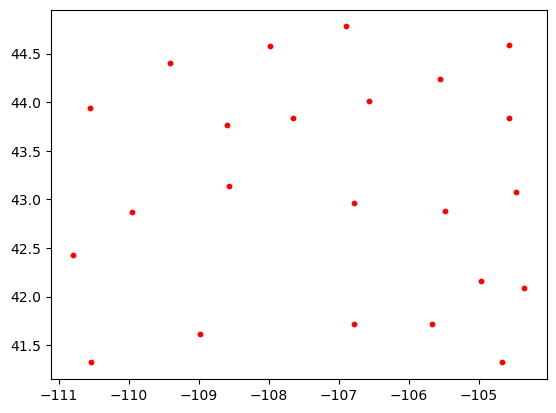

In [76]:
# plotting the centroids
plt.scatter(*zip(*geometry_df['coords']), s=10, c='r')
plt.show()

In [77]:
# put each coordinates into array and then stack them together
data_coordinates = np.array([np.array(coord) for coord in geometry_df['coords']])

In [80]:
data_coordinates.shape

(23, 2)

##### Ploting persistence diagrams for point cloud data(geodata)

In [81]:
def diagram_sizes(dgms):
    return ", ".join([f"|$H_{i}$|={len(d)}" for i, d in enumerate(dgms)])

##### Method 1

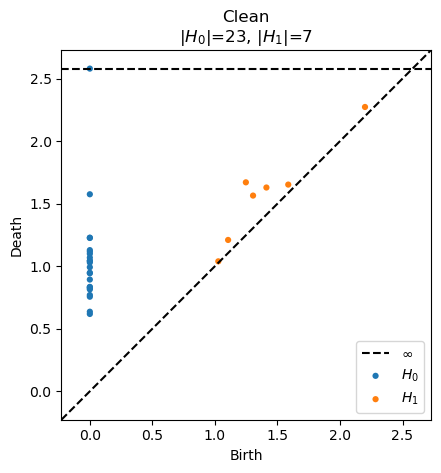

In [84]:
dgm_clean = ripser.ripser(data_coordinates)['dgms']
persim.plot_diagrams(
    dgm_clean,
    show=True,
    title=f"Clean\n{diagram_sizes(dgm_clean)}"
)

##### Method 2

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


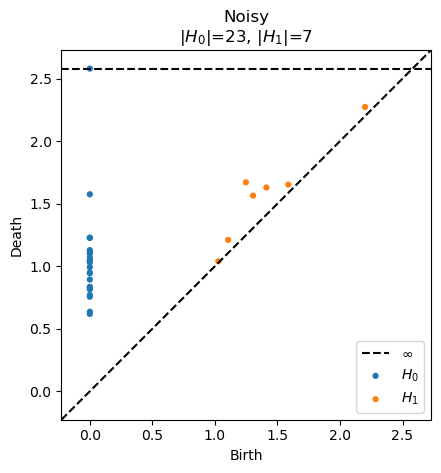

In [83]:
from ripser import Rips
rips = Rips()
dgm_wyoming = rips.transform(data_coordinates)
rips.plot(show=True, title=f"Noisy\n{diagram_sizes(dgm_wyoming)}")

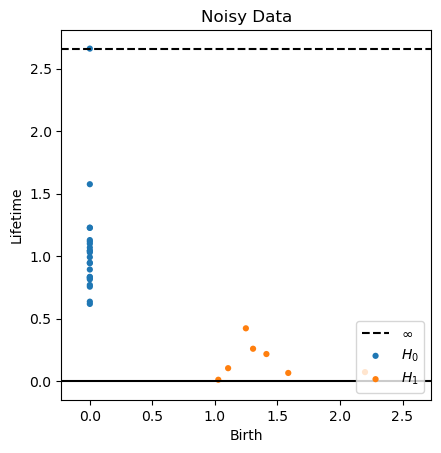

In [87]:
persim.plot_diagrams(
    dgm_wyoming,
    title="Noisy Data",
    lifetime=True,
    show=True
)

<Axes: title={'center': 'Persistence Image'}, xlabel='birth', ylabel='persistence'>

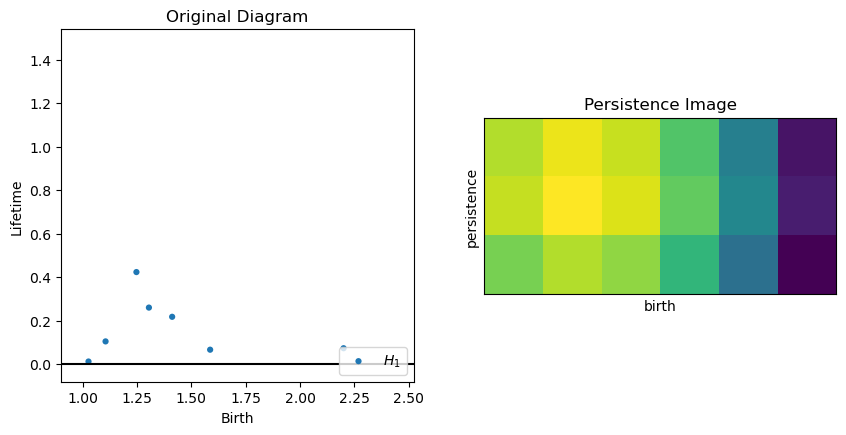

In [85]:
from persim import PersistenceImager

pimager = PersistenceImager(pixel_size=0.2)

# The `fit()` method can be called on one or more (*,2) numpy arrays
# to automatically determine the miniumum birth and persistence ranges needed to capture all persistence pairs.
# The ranges and resolution are automatically adjusted to accomodate the specified pixel size.
pimager.fit(dgm_wyoming[1:3])

# The `transform()` method can then be called on one or more (*,2) numpy arrays
# to generate persistence images from diagrams.
imgs = pimager.transform(dgm_wyoming[1:3])

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].set_title("Original Diagram")
persim.plot_diagrams(dgm_wyoming[1:3],  lifetime=True, ax=axs[0], labels=["$H_1$", "$H_2$"])

axs[1].set_title("Persistence Image")
pimager.plot_image(imgs[0], ax=axs[1])

##### Persistence Landscapes

In [89]:
dgms_wy = ripser.ripser(data_coordinates, maxdim=2)['dgms']

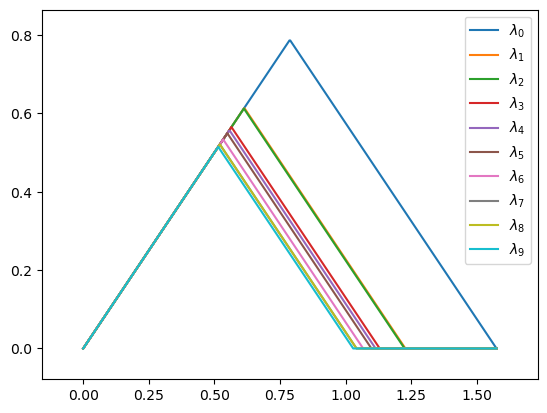

In [90]:
from persim import PersLandscapeApprox, PersLandscapeExact
from persim.landscapes import plot_landscape_simple

pla = PersLandscapeApprox(dgms=dgm_wyoming,hom_deg=0)
ax = plot_landscape_simple(pla, depth_range=range(10))

##### Storage of diagrams
dgms - diagram informations

In [93]:
data = ripser.ripser(data_coordinates, maxdim=2)

In [94]:
print(data.keys())

dict_keys(['dgms', 'cocycles', 'num_edges', 'dperm2all', 'idx_perm', 'r_cover'])


In [99]:
data['dgms']

[array([[0.        , 0.61818582],
        [0.        , 0.63626379],
        [0.        , 0.75611877],
        [0.        , 0.76975465],
        [0.        , 0.81474233],
        [0.        , 0.82400411],
        [0.        , 0.83168441],
        [0.        , 0.83470851],
        [0.        , 0.89327586],
        [0.        , 0.94367933],
        [0.        , 0.94796997],
        [0.        , 0.99185222],
        [0.        , 1.02945971],
        [0.        , 1.04245818],
        [0.        , 1.04312027],
        [0.        , 1.06845665],
        [0.        , 1.09901524],
        [0.        , 1.1155889 ],
        [0.        , 1.12855875],
        [0.        , 1.22580111],
        [0.        , 1.22833312],
        [0.        , 1.57510161],
        [0.        ,        inf]]),
 array([[2.19983959, 2.27290154],
        [1.586285  , 1.652542  ],
        [1.41161966, 1.62912273],
        [1.30482137, 1.56469655],
        [1.24739003, 1.67056787],
        [1.10546327, 1.20986855],
        [1.0